In [3]:

pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install tensorflow-federated

Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip install nest-asyncio
!pip install pandas
!pip install matplotlib

In [2]:
import collections
import os
import pandas as pd
import tensorflow as tf
import tensorflow_federated as tff
import time
from matplotlib import pyplot as plt
import nest_asyncio
import numpy as np
nest_asyncio.apply()

%matplotlib inline

2024-02-26 05:54:09.590756: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-26 05:54:11.894626: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 05:54:11.894679: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 05:54:11.898424: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-26 05:54:12.840357: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-26 05:54:12.841189: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [3]:
df_train = pd.read_csv('/workspaces/Network_Intrusion_Detection/KDDTrain+.txt')  # Replace with the actual path
df_test = pd.read_csv('/workspaces/Network_Intrusion_Detection/KDDTest+.txt')  

In [4]:
df_train.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level']

df_test.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level']

In [5]:
df_train = df_train.drop('difficulty_level', 1)
df_test = df_test.drop('difficulty_level', 1)

/tmp/ipykernel_9400/1093709786.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_train = df_train.drop('difficulty_level', 1)
/tmp/ipykernel_9400/1093709786.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_test = df_test.drop('difficulty_level', 1)


In [6]:
df_train['protocol_type'] = df_train['protocol_type'].str.lower()
df_test['protocol_type'] = df_test['protocol_type'].str.lower()

df_train['service'] = df_train['service'].str.lower()
df_test['service'] = df_test['service'].str.lower()

df_train['flag'] = df_train['flag'].str.lower()
df_test['flag'] = df_test['flag'].str.lower()

In [7]:
unique_labels_pro_train = list(df_train.protocol_type.astype('category').unique())
unique_codes_pro_train = list(df_train.protocol_type.astype('category').cat.codes.unique())
mapping_pro_train = {unique_codes_pro_train[i] : unique_labels_pro_train[i] for i in range(len(unique_labels_pro_train))}

unique_labels_pro_test = list(df_test.protocol_type.astype('category').unique())
unique_codes_pro_test = list(df_test.protocol_type.astype('category').cat.codes.unique())
mapping_pro_test = {unique_codes_pro_test[i] : unique_labels_pro_test[i] for i in range(len(unique_labels_pro_test))}

In [8]:
print(mapping_pro_test)
print(mapping_pro_train)

{1: 'tcp', 0: 'icmp', 2: 'udp'}
{2: 'udp', 1: 'tcp', 0: 'icmp'}


In [9]:
df_train['protocol_type'] = df_train['protocol_type'].replace(unique_labels_pro_train, unique_codes_pro_train)
df_test['protocol_type'] = df_test['protocol_type'].replace(unique_labels_pro_test, unique_codes_pro_test)

In [10]:
unique_labels_ser_train = list(df_train.service.astype('category').unique())
unique_codes_ser_train = list(df_train.service.astype('category').cat.codes.unique())
mapping_ser_train = {unique_codes_ser_train[i] : unique_labels_ser_train[i] for i in range(len(unique_labels_ser_train))}

unique_labels_ser_test = list(df_test.service.astype('category').unique())
unique_codes_ser_test = list(df_test.service.astype('category').cat.codes.unique())
mapping_ser_test = {unique_codes_ser_test[i] : unique_labels_ser_test[i] for i in range(len(unique_labels_ser_test))}

In [12]:
print(mapping_ser_test)
print(mapping_ser_train)

{43: 'private', 16: 'ftp_data', 10: 'eco_i', 53: 'telnet', 19: 'http', 47: 'smtp', 15: 'ftp', 26: 'ldap', 41: 'pop_3', 2: 'courier', 6: 'discard', 11: 'ecr_i', 21: 'imap4', 8: 'domain_u', 29: 'mtp', 52: 'systat', 23: 'iso_tsap', 38: 'other', 3: 'csnet_ns', 14: 'finger', 58: 'uucp', 61: 'whois', 32: 'netbios_ns', 27: 'link', 63: 'z39_50', 50: 'sunrpc', 0: 'auth', 31: 'netbios_dgm', 59: 'uucp_path', 60: 'vmnet', 7: 'domain', 30: 'name', 40: 'pop_2', 20: 'http_443', 57: 'urp_i', 28: 'login', 17: 'gopher', 13: 'exec', 56: 'time', 44: 'remote_job', 49: 'ssh', 25: 'kshell', 48: 'sql_net', 46: 'shell', 18: 'hostnames', 9: 'echo', 5: 'daytime', 39: 'pm_dump', 22: 'irc', 34: 'netstat', 4: 'ctf', 36: 'nntp', 33: 'netbios_ssn', 55: 'tim_i', 51: 'supdup', 1: 'bgp', 35: 'nnsp', 45: 'rje', 42: 'printer', 12: 'efs', 62: 'x11', 37: 'ntp_u', 24: 'klogin', 54: 'tftp_u'}
{42: 'other', 47: 'private', 21: 'http', 49: 'remote_job', 17: 'ftp_data', 34: 'name', 36: 'netbios_ns', 11: 'eco_i', 33: 'mtp', 58: 't

In [13]:
df_train['service'] = df_train['service'].replace(unique_labels_ser_train, unique_codes_ser_train)
df_test['service'] = df_test['service'].replace(unique_labels_ser_test, unique_codes_ser_test)

In [14]:
unique_labels_flag_train = list(df_train.flag.astype('category').unique())
unique_codes_flag_train = list(df_train.flag.astype('category').cat.codes.unique())
mapping_flag_train = {unique_codes_flag_train[i] : unique_labels_flag_train[i] for i in range(len(unique_labels_flag_train))}

unique_labels_flag_test = list(df_test.flag.astype('category').unique())
unique_codes_flag_test = list(df_test.flag.astype('category').cat.codes.unique())
mapping_flag_test = {unique_codes_flag_test[i] : unique_labels_flag_test[i] for i in range(len(unique_labels_flag_test))}

In [15]:
df_train['flag'] = df_train['flag'].replace(unique_labels_flag_train, unique_codes_flag_train)
df_test['flag'] = df_test['flag'].replace(unique_labels_flag_test, unique_codes_flag_test)

In [16]:

df_train['subclass'] = df_train['subclass'].str.lower()
df_test['subclass'] = df_test['subclass'].str.lower()

In [17]:

tmp = df_train.pop('subclass')
tmp1 = df_test.pop('subclass')

In [18]:
classlist=[]
classlist_test=[]
NormalCount = 0
AttackCount = 0
NormalCount_test = 0
AttackCount_test = 0

for item in tmp:
    if(item == "normal"):
        classlist.append("normal")
        NormalCount+=1
    else:
        classlist.append("attack")
        AttackCount+=1

for item in tmp1:
    if(item == "normal"):
        classlist_test.append("normal")
        NormalCount_test+=1
    else:
        classlist_test.append("attack")
        AttackCount_test+=1

In [19]:
df_train["subclass"] =classlist
df_test["subclass"] = classlist_test

In [20]:
unique_labels = list(df_train.subclass.astype('category').unique())
unique_codes = list(df_train.subclass.astype('category').cat.codes.unique())
mapping = {unique_codes[i] : unique_labels[i] for i in range(len(unique_labels))}

unique_labels_test = list(df_test.subclass.astype('category').unique())
unique_codes_test = list(df_test.subclass.astype('category').cat.codes.unique())
mapping_test = {unique_codes_test[i] : unique_labels_test[i] for i in range(len(unique_labels_test))}

In [21]:
df_train['subclass'] = df_train['subclass'].replace(unique_labels, unique_codes)
df_test['subclass'] = df_test['subclass'].replace(unique_labels_test, unique_codes_test)

In [22]:

train = df_train
test = df_test

In [23]:
n_workers=2
n_samples = int(df_train.shape[0] / n_workers)
n_samples_test = int(df_test.shape[0]/n_workers)
assert n_samples > 0, "Each worker must be assigned at least one data point"

In [24]:
import numpy as np
n_epochs = 10
shuffle_buffer_size = df_train.shape[0]
batch_size = 250
prefetch_buffer_size = 50
input_shape = df_train.shape[1]-1
output_shape = len(unique_codes)
print(output_shape , " output_shape")
print("shuffle_buffer_size ", shuffle_buffer_size)
print("batch_size ",batch_size)
print("prefetch_buffer_size ", prefetch_buffer_size)
print("input_shape ", input_shape)

shuffle_buffer_size_test = df_test.shape[0]
print(shuffle_buffer_size_test, "shuffle_buffer_size_test")
batch_size_test = 250
prefetch_buffer_size_test = 50
input_shape_test = df_test.shape[1]-1
print(input_shape_test,"input_shape_test")
output_shape_test = len(unique_codes_test)
print(output_shape_test,"output_shape_test")

2  output_shape
shuffle_buffer_size  125972
batch_size  250
prefetch_buffer_size  50
input_shape  41
22543 shuffle_buffer_size_test
41 input_shape_test
2 output_shape_test


In [25]:
def preprocess(dataframe):

    """Flatten a batch `pixels` and return the features as an `OrderedDict`."""
    def map_fn(dataset):
        return collections.OrderedDict(
            x=tf.cast(dataset[:,:-1], tf.float64),
            y=tf.cast(tf.reshape(dataset[:,-1], shape=(-1, 1)), tf.int64)
        )

    return tf.data.Dataset.from_tensor_slices(dataframe).repeat(n_epochs).shuffle(
        shuffle_buffer_size).batch(batch_size).map(map_fn).prefetch(prefetch_buffer_size)


client_data = [preprocess(train.sample(n=n_samples)) for _ in range(n_workers)]

2024-02-26 05:56:03.105924: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21163296 exceeds 10% of free system memory.


In [26]:
def preprocess_test(dataframe):

    """Flatten a batch `pixels` and return the features as an `OrderedDict`."""
    def map_fn(dataset):
        return collections.OrderedDict(
            x=tf.cast(dataset[:,:-1], tf.float64),
            y=tf.cast(tf.reshape(dataset[:,-1], shape=(-1, 1)), tf.int64)
        )

    return tf.data.Dataset.from_tensor_slices(dataframe).repeat(n_epochs).shuffle(
        shuffle_buffer_size_test).batch(batch_size_test).map(map_fn).prefetch(prefetch_buffer_size_test)


client_data_test = [preprocess(test.sample(n=n_samples_test)) for _ in range(n_workers)]

In [27]:
for i in range(n_workers):
    print(f"Worker {i+1} data contains {len(client_data[i])} training points")

Worker 1 data contains 2520 training points
Worker 2 data contains 2520 training points


In [28]:
for i in range(n_workers):
    print(f"Worker {i+1} data contains {len(client_data_test[i])} testing points")

Worker 1 data contains 451 testing points
Worker 2 data contains 451 testing points


2024-02-26 05:56:03.287359: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21163296 exceeds 10% of free system memory.


2024-02-26 05:56:06.017324: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21163296 exceeds 10% of free system memory.


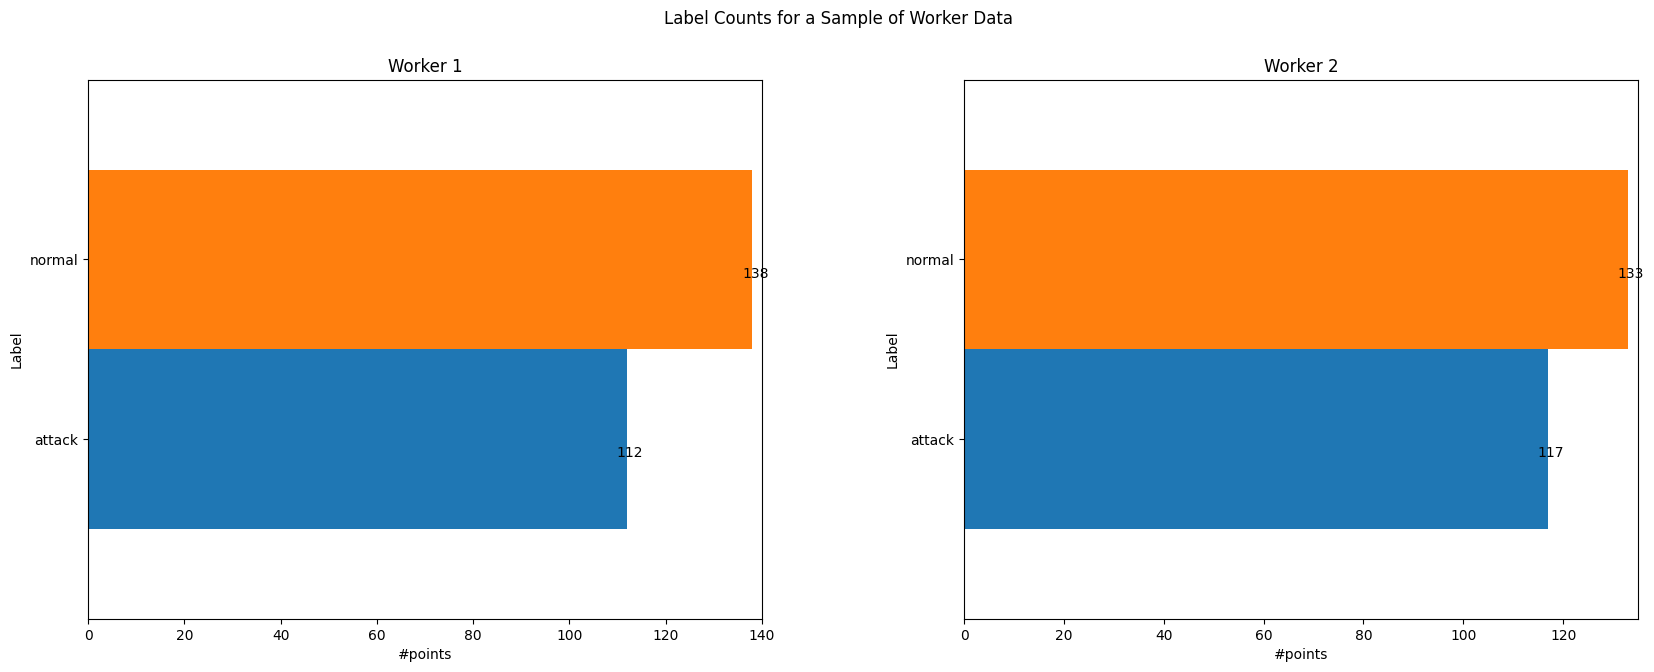

In [29]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 7))
fig.suptitle('Label Counts for a Sample of Worker Data')
fig.tight_layout()

for i in range(n_workers):
    m = 0
    plot_data = collections.defaultdict(list)
    for label in list(client_data[i])[0]['y'].numpy()[:,0]:
        plot_data[label].append(label)
        m = max(m, len(plot_data[label]))

    n_cols = n_workers if n_workers < 5 else 5
    xlim = [0, m+(5-m%5)]
    ylim = [min(unique_codes)-1, max(unique_codes)+1]
    yticks = list(range(min(unique_codes), max(unique_codes)+1))
    yticks_labels = [mapping[k] for k in range(0, max(unique_codes)+1)]

    plt.subplot(int(n_workers / 5)+1, n_cols, i+1)
    plt.subplots_adjust(wspace=0.3)
    plt.title('Worker {}'.format(i+1))
    plt.xlabel('#points')
    plt.xlim(xlim)
    plt.ylabel('Label')
    plt.ylim(ylim)
    plt.yticks(yticks, labels=yticks_labels)

   
    for key in plot_data:
        if len(plot_data[key]) > 0:
            plt.text(len(plot_data[key])+0.6, int(key)-0.1, str(len(plot_data[key])), ha='center')

    for j in range(min(unique_codes),max(unique_codes)+1):
        plt.hist(
            plot_data[j],
            density=False,
            bins=[k-0.5 for k in range(min(unique_codes),max(unique_codes)+2)],
            orientation='horizontal'
        )

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU, Bidirectional, BatchNormalization,Convolution1D,MaxPooling1D, Reshape, GlobalAveragePooling1D
from keras.utils import to_categorical
import sklearn.preprocessing
from sklearn import metrics
from scipy.stats import zscore
from keras.layers import Dense
from sklearn.metrics import precision_score, recall_score, f1_score
from keras.optimizers import Adam

In [40]:
def model_fn():
    input_layer = tf.keras.layers.Input(shape=(input_shape,))
    x = tf.keras.layers.Reshape((1, input_shape))(input_layer)
    x = tf.keras.layers.LSTM(units=128, return_sequences=True)(x)
    x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=64, return_sequences=True))(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    output_layer = tf.keras.layers.Dense(output_shape, activation='softmax')(x)

    model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

    return tff.learning.models.from_keras_model(
        model,
        input_spec=collections.OrderedDict(
            x=tf.TensorSpec(shape=[None, input_shape], dtype=tf.float64),
            y=tf.TensorSpec(shape=[None, output_shape], dtype=tf.int64)),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy(),
                 tf.keras.metrics.Precision(name='precision'),
                 tf.keras.metrics.Recall(name='recall'),
                 tf.keras.metrics.BinaryAccuracy(name='binary_accuracy'),
                 tf.keras.metrics.F1Score(name='f1_score')])

tff_model = model_fn()

In [41]:
trainer = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=0.01),
    server_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=1.0)
)

ValueError: in user code:

    File "/home/codespace/.python/current/lib/python3.10/site-packages/tensorflow_federated/python/learning/templates/model_delta_client_work.py", line 189, in reduce_fn  *
        output = model.forward_pass(batch, training=True)
    File "/home/codespace/.python/current/lib/python3.10/site-packages/tensorflow_federated/python/learning/dataset_reduce.py", line 29, in _dataset_reduce_fn  *
        return dataset.reduce(initial_state=initial_state_fn(), reduce_func=reduce_fn)
    File "/home/codespace/.python/current/lib/python3.10/site-packages/tensorflow_federated/python/learning/models/keras_utils.py", line 499, in forward_pass  *
        return self._forward_pass(batch_input, training=training)
    File "/home/codespace/.python/current/lib/python3.10/site-packages/tensorflow_federated/python/learning/models/keras_utils.py", line 486, in _forward_pass  *
        metric.update_state(y_true=y_true, y_pred=predictions)  # pytype: disable=attribute-error
    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/utils/metrics_utils.py", line 77, in decorated  **
        result = update_state_fn(*args, **kwargs)
    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/metrics/base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/metrics/confusion_metrics.py", line 470, in update_state  **
        return metrics_utils.update_confusion_matrix_variables(
    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/utils/metrics_utils.py", line 672, in update_confusion_matrix_variables
        y_pred.shape.assert_is_compatible_with(y_true.shape)

    ValueError: Shapes (None, 1, 2) and (None, 2) are incompatible
